# Using DTW to compare sounds 

Using [librosa](https://github.com/bmcfee/librosa/) for instance, you can easily extract the MFCC of sound.

### Compute the MFCCs of two sounds

In [9]:
import librosa

y1, sr1 = librosa.load('record01.wav')
y2, sr2 = librosa.load('Nellie1.wav')
np.set_printoptions(threshold=sys.maxsize)

Populating the interactive namespace from numpy and matplotlib
(87, 20)
[[-5.21041016e+02  3.89906158e+01  2.31509438e+01  1.15493736e+01
   9.07002831e+00  1.13744717e+01  1.02806034e+01  4.41833448e+00
  -3.10168028e+00 -8.78834057e+00 -1.04830198e+01 -8.78955650e+00
  -5.73412418e+00 -5.94193983e+00 -1.04599419e+01 -1.48203773e+01
  -1.51715412e+01 -1.07778683e+01 -6.33622551e+00 -4.62288284e+00]
 [-4.48301605e+02  8.06138077e+01  2.50487633e+01  2.78153000e+01
   1.36074123e+01  2.21902580e+01  1.60596523e+01  2.93034887e+00
   5.62823200e+00 -3.16827536e+00 -8.11742592e+00 -4.05077791e+00
   2.44627762e+00 -2.91155338e-01 -7.93632078e+00 -5.75541544e+00
  -1.77274144e+00 -1.88067079e-01 -1.42740893e+00  9.07810032e-03]
 [-4.04216003e+02  8.21727905e+01  1.61471939e+01  3.90899239e+01
   1.08274651e+01  2.85550690e+01  8.97325516e+00  4.32254076e+00
   7.30804205e+00  1.85389209e+00  1.99996257e+00 -2.38700008e+00
   2.82275391e+00 -1.96862364e+00 -3.35347748e+00 -2.56997061e+00
  

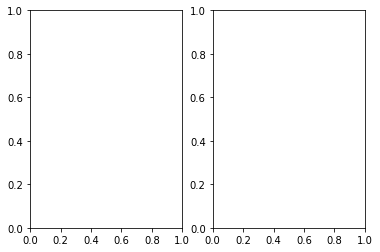

In [12]:
%pylab inline

subplot(1, 2, 1)
mfcc1 = librosa.feature.mfcc(y1, sr1)
# librosa.display.specshow(mfcc1)

subplot(1, 2, 2)
mfcc2 = librosa.feature.mfcc(y2, sr2)
# librosa.display.specshow(mfcc2)
mfcc1_matrix = mfcc1.T
print(mfcc1_matrix.shape)
print(mfcc1.T)

### Compare them using DTW

In [3]:
from dtw import dtw

In [4]:
from numpy.linalg import norm
dist, cost, acc_cost, path = dtw(mfcc1.T, mfcc2.T, dist=lambda x, y: norm(x - y, ord=1))
print 'Normalized distance between the two sounds:', dist

Normalized distance between the two sounds: 192.489808008


(-0.5, 37.5)

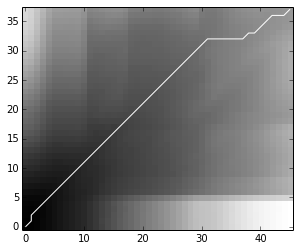

In [5]:
imshow(cost.T, origin='lower', cmap=cm.gray, interpolation='nearest')
plot(path[0], path[1], 'w')
xlim((-0.5, cost.shape[0]-0.5))
ylim((-0.5, cost.shape[1]-0.5))